## Using an Artificial Neural Network to Classify Music Genre

In [1]:
# feature extraction
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# preprocessing
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
# deep learning modeling
import keras
from keras import layers
from keras import layers
import keras
from keras.models import Sequential
# progress bar
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
# extract features from GTZAN genre wav files and make a dataset outlining them
file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in tqdm(genres):
    for filename in tqdm(os.listdir(f'/Volumes/S190813/Coding/genres/{g}')):
        songname = f'/Volumes/S190813/Coding/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = librosa.feature.rms(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('dataset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [3]:
# load the dataset and preprocess for modeling
data = pd.read_csv('dataset.csv')
data.head()
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# instantiate a simple artifical neural network
model = Sequential()
model.add(layers.Dense(256, activation='relu', 
                       input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               6912      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 48,714
Trainable params: 48,714
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
800/800 [==============================] - 0s 233us/step - loss: 2.1568 - accuracy: 0.2475
Epoch 2/100
800/800 [==============================] - 0s 60us/step - loss: 1.8441 - accuracy: 0.3762
Epoch 3/100
800/800 [==============================] - 0s 61us/step - loss: 1.5962 - accuracy: 0.4400
Epoch 4/100
800/800 [==============================] - 0s 48us/step - loss: 1.3979 - accuracy: 0.5275
Epoch 5/100
800/800 [==============================] - 0s 43us/step - loss: 1.2629 - accuracy: 0.5750
Epoch 6/100
800/800 [==============================] - 0s 50us/step - loss: 1.1581 - accuracy: 0.5938
Epoch 7/100
800/800 [==============================] - 0s 43us/step - loss: 1.0542 - accuracy: 0.6488
Epoch 8/100
800/800 [==============================] - 0s 45us/step - loss: 0.9839 - accuracy: 0.6900
Epoch 9/100
800/800 [==============================] - 0s 44us/step - loss: 0.9169 - accuracy: 0.7063
Epoch 10/100
800/800 [==============================] - 0s 40us/step - loss: 0.87

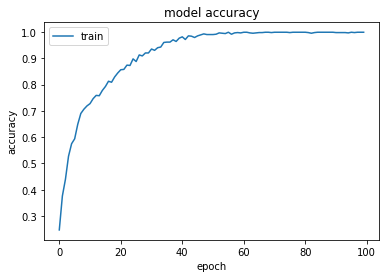

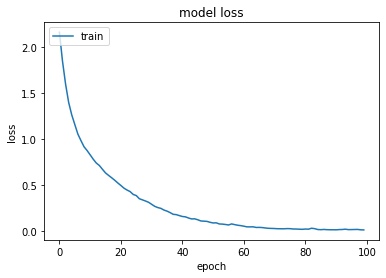

In [6]:
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('M6_ANN_training_accuracy')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('M6_ANN_training_loss')
plt.show()

In [7]:
# evaluate the model's training
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 69.50%


In [8]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test, batch_size=128)
print('test loss, test acc:', results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print('\n# Generate predictions for 3 samples')
predictions = model.predict(X_test[:3])
print('predictions shape:', predictions.shape)


# Evaluate on test data
200/200 [==============================] - 0s 83us/step
test loss, test acc: [1.6376974010467529, 0.6949999928474426]

# Generate predictions for 3 samples
predictions shape: (3, 10)
